In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
BSS_data = pd.read_csv('example_data/batting_season_summary.csv')
free_agents = pd.read_csv('example_data/submission_example.csv')

C:\Users\arnav\AppData\Local\Temp\ipykernel_8268\1651213690.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [6]:
# free_agents.drop(columns=['Expected Number of Hits Next Season', 'Bid Amount($)'], inplace=True)

In [39]:
free_agents.head()


,Name
0,Aaron Looper
1,Adam Peterson
2,Adam Wilk
3,Adrian Houser
4,Agustin Montero


In [98]:
# Print BSS_data only if player Name is in free_agents
BSS_FA = BSS_data[BSS_data['Name'].isin(free_agents['Name'])]
BSS_FA.head()

,Name,age,team,pos,PA,AB,H,2B,3B,HR,BB,SO,P/PA,BA,OBP,SLG,OPS,Year
3,Adam Peterson,21,Braves,1B,742,668,192,45,40,10,74,161,3.357143,0.287425,0.358491,0.519461,0.877952,2014
5,Adrian Houser,33,Royals,SS,668,622,143,32,21,12,46,147,3.188623,0.229904,0.282934,0.406752,0.689687,2014
18,Angel Castro,28,Mets,LF,674,622,136,26,15,4,52,136,3.261128,0.218650,0.278932,0.327974,0.606906,2014
20,Angel Salome,34,Angels,2B,695,668,148,33,20,10,27,135,3.060432,0.221557,0.251799,0.375749,0.627547,2014
22,Arturo Lopez,27,Rays,SS,664,602,167,38,23,18,62,139,3.334337,0.277409,0.344880,0.506645,0.851524,2014


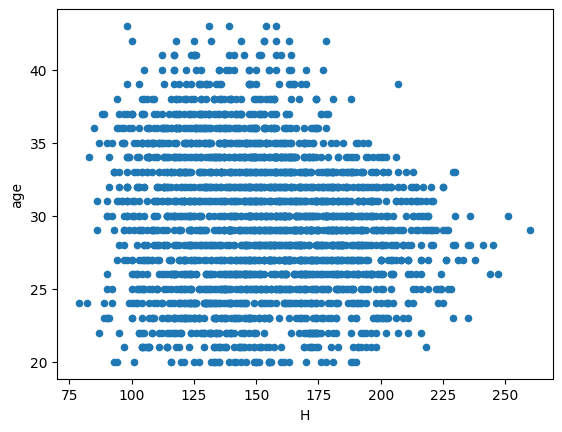

In [115]:
# BSS_data.boxplot(column='H', by='pos', figsize=(12, 8))
BSS_data.plot.scatter(x='H', y='age')
plt.show()

In [46]:
# for each player, take the average of all the seasons they have played

# Get the columns that are not categorical
numerical_vals = BSS_data.drop(columns=['team', 'pos'])

# Remove players that are not in free_agents
numerical_vals = numerical_vals[numerical_vals['Name'].isin(free_agents['Name'])]

BSS_data_grouped = numerical_vals.groupby(['Name']).mean()

In [96]:
BSS_data_grouped

,age,PA,AB,H,2B,3B,HR,BB,SO,P/PA,BA,OBP,SLG,OPS,Year
Name,,,,,,,,,,,,,,,
Aaron Looper,34.5,743.5,667.625,172.375,36.375,24.5,11.875,75.875,142.0,3.411831,0.258041,0.333523,0.439208,0.772731,2019.5
Adam Peterson,25.5,749.1,673.200,182.300,39.900,28.3,13.200,75.900,156.8,3.432396,0.270652,0.344295,0.472664,0.816959,2018.5
Adam Wilk,20.5,678.5,651.000,146.500,35.000,25.0,5.500,27.500,186.0,3.286620,0.225174,0.256561,0.381089,0.637651,2022.5
Adrian Houser,37.5,663.7,623.600,140.300,30.800,21.2,9.300,40.100,136.0,3.201135,0.224925,0.271715,0.387049,0.658764,2018.5
Agustin Montero,31.0,628.0,580.000,121.000,29.000,19.0,2.000,48.000,175.0,3.490446,0.208621,0.269108,0.334483,0.603591,2023.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Keith McDonald,27.0,696.0,612.000,200.000,42.000,25.0,20.000,84.000,77.0,3.170977,0.326797,0.408046,0.575163,0.983209,2023.0
Ken Vining,27.0,738.0,670.000,151.000,30.000,27.0,4.000,68.000,184.0,3.609756,0.225373,0.296748,0.368657,0.665405,2023.0
Kensuke Tanaka,35.5,627.2,591.700,148.900,35.800,18.9,9.800,35.500,83.5,2.944005,0.251785,0.294094,0.425929,0.720024,2018.5


In [91]:
from sklearn.linear_model import LinearRegression

# Create the linear regression model
model = LinearRegression()

# Prepare the input features and target variable
X = BSS_data_grouped[['age', 'PA', 'AB', 'BB', 'SO']]
y = BSS_data_grouped['H']

# Fit the model to the data
model.fit(X, y)

# Print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('R^2:', model.score(X, y))


Coefficients: [-5.13747194e-01 -6.00197464e+10  6.00197464e+10  6.00197464e+10
 -2.02012539e-01]
Intercept: -59.44964284531906
R^2: 0.45152554208900664


In [92]:
# Get a player not in free_agents from 2014
player = BSS_data[~BSS_data['Name'].isin(free_agents['Name']) & (BSS_data['Year'] == 2014)]

player.iloc[0]
stats = player[['age', 'PA', 'AB', 'BB', 'SO']].values
len(stats[0])

# # Predict the number of hits
hits = model.predict(stats)


C:\Users\arnav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [95]:
# print('Predicted hits for:', player['Name'].values[0], hits)
# hits

# Vector multiply the stats by the coefficients and sum the result
hits

array([2.04067138e+12, 3.37911172e+13, 2.94696955e+13, 4.32142174e+12,
       9.06298170e+12])